In [1]:
# Import libraries and load the dataset into a pandas DataFrame

#Importing Libraries
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import IPython
from IPython.display import display
# !python --version    # Uncomment to check Python version
#print(pd.__version__)
#print(np.__version__)
#print(matplotlib.__version__)
#print(IPython.__version__)

# Creating a pandas DataFrame
df = pd.read_csv('student.csv', sep=',')

print('='*60)
print('Dataset loaded successfully!')
print('='*60)

Dataset loaded successfully!


In [2]:
# Custom Helper Functions Used Throughout the Project

def data_basic(df):

    """
    Generate and display an overview of a DataFrame.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame to analyze.

    Output:
    -------
    Prints:
        - Number of rows and columns
        - Column names
        - First five rows of the dataset
        - Count of each data type
        - Basic descriptive statistics for numerical columns

    Notes:
    ------
    This function is intended for an initial, high-level inspection
    of the dataset before any preprocessing or analysis steps.
    """
    
    print('='*60)
    print('DATA OVERVIEW')
    print('='*60)
    
    #Shape
    print(f'\nRows: {df.shape[0]}\nColumns: {df.shape[1]}\n')

    #Columns
    print(f'Columns: {df.columns.to_list()}\n')

    #Data Preview:
    print(f'Data preview:\n{df.head(5)}\n')

    #Data type count:
    print(f'Data types:\n{df.dtypes.value_counts()}\n')

    #Basic Descriptive Statistics for numerical columns
    print(f'Descriptive Statistics- numeric columns:\n{df.describe().round(2)}')

def check_duplicates_nan(df):

    """
    Prints the total number of duplicated rows and missing (NaN) values in a DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame to analyze.

    Returns
    -------
    None
        Prints summary information directly to the console.

    Description
    -----------
    This function provides a quick data quality check by:
    - counting the number of duplicated rows using `DataFrame.duplicated().sum()`,
    - counting the total number of missing values using `DataFrame.isnull().sum().sum()`.

    Example
    -------
    >>> duplicated_nan(df)
    ============================================================
    Duplicated rows and NaN values report
    ============================================================
    Duplicated rows: 0
    NaN values: 12
    """


    print('='*60)
    print('Duplicated rows and NaN values report')
    print('='*60)
    is_duplicated = df.duplicated().sum()
    is_na = df.isnull().sum().sum()

    print(f'Duplicated rows: {is_duplicated}')
    print(f'NaN values: {is_na}')


def map_yes_no(df, col):
    
    """
    Maps 'yes'/'no' string values in selected columns to binary integers (1 and 0).

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame containing the columns to modify.
    col : list
        List of column names where 'yes'/'no' values should be mapped to 1/0.

    Returns
    -------
    pandas.DataFrame
        The original DataFrame with updated binary columns.

    Description
    -----------
    This function replaces all 'yes'/'no' string values in the specified columns
    with numeric equivalents (1 for 'yes', 0 for 'no'), converts the result to
    integer type (`np.int64`), and prints a confirmation message.

    Example
    -------
    >>> columns = ['schoolsup', 'famsup', 'activities']
    >>> df = map_yes_no(df, columns)
    Values in a given column list successfully changed!
    """

    df[col] = df[col].apply(lambda s: s.map({'yes': 1, 'no': 0}).astype(np.int64))

    print('Values in a given column list successfully changed.')

    return df

def bar_category(data, title='Title', x=None, y=None):

    """
    Create a vertical bar chart for a 1D numeric Series.

    Parameters
    ----------
    data : pandas.Series
        A 1D numeric series where:
        - index = category labels
        - values = numeric values to plot
        
    title : str, optional
        Title of the chart. Default is 'Title'.
        
    x : str or None, optional
        Label for the x-axis (name of the category). If None, no label is shown.
        
    y : str or None, optional
        Label for the y-axis (numeric meaning). If None, no label is shown.

    Returns
    -------
    matplotlib.figure.Figure
        The figure object containing the bar chart.
    
    Notes
    -----
    - Automatically annotates each bar with its value.
    - Uses consistent background colors (whitesmoke figure, lightgray axis).
    - Does not call plt.show(); user controls display or saving.
    """
    
    fig, ax = plt.subplots(figsize=(4,5))
    bars = ax.bar(data.index, data.values)

    for bar, val in zip(bars, data.values):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + bar.get_height() *0.02,
            f'{val:.2f}',
            ha='center', va='center', fontsize=8
        )
    
    fig.set_facecolor('whitesmoke')
    ax.set_facecolor('lightgray')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)
    fig.tight_layout()

    return fig

def corr_coef(df, feature, target):

    """
    Calculate the correlation between a feature and a target with safety checks.

    The function verifies that both variables are numeric and contain at least
    two unique values. If any condition fails, it returns a clear message instead
    of raising an error. Otherwise, it computes Pearson correlation and returns
    both the numeric score and a human-readable interpretation.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing both the feature and target columns.

    feature : str
        Name of the feature column. Must be numeric and contain at least
        two unique values.

    target : str
        Name of the target column. Must be numeric and contain at least
        two unique values.

    Returns
    -------
    score : float or None
        Pearson correlation coefficient between the feature and target.
        Returns None if correlation cannot be computed.

    report : str
        Human-readable summary describing:
        - which variables were analyzed,
        - the correlation score,
        - the strength (very weak → very strong),
        - the direction (positive, negative, or no direction),
        - or an explanation why correlation was not computed.

    Notes
    -----
    - Pearson correlation is used.
    - Non-numeric or constant columns are handled gracefully with messages.
    - This function is designed for feature-by-feature reports.
    """

    x = df[feature]
    y = df[target]

    if not is_numeric_dtype(x):
        return None, f'Correlation not computed: {feature} is not numeric.'

    if not is_numeric_dtype(y):
        return None, f'Correlation not computed: {target} is not numeric.'

    if x.nunique() < 2:
        return None, f'Correlation not computed: {feature} has less than two unique values.'

    if y.nunique() < 2:
        return None, f'Correlation not computed: {target} has less than two unique values.'

    score = x.corr(y).round(4)

    if abs(score) < 0.2:
        strength = 'very weak'
    elif abs(score) < 0.4:
        strength = 'weak'
    elif abs(score) < 0.6:
        strength = 'moderate'
    elif abs(score) < 0.8:
        strength = 'strong'
    else:
        strength = 'very strong'

    direction = (
        'positive' if score > 0 else
        'negative' if score < 0 else
        'no direction'
    ) 

    report = (
        f'Correlation: {feature.upper()} vs {target.upper()}\n'
        f'Score: {score}\n'
        f'Strength: {strength} ({direction})'
    )

    return score, report

def feature_report(df, df_ml, feature, target, plot_title, folder=None):

    """
    Generate a complete analysis report for a single categorical feature.

    The report includes:
    - mean target values grouped by the feature,
    - a bar chart (with optional saving),
    - binary difference analysis (yes/no or 1/0 features),
    - numeric correlation using the processed df_ml.

    Parameters
    ----------
    df : pandas.DataFrame
        Original DataFrame used for grouping and visualizations.

    df_ml : pandas.DataFrame
        DataFrame with numeric-encoded features, used for correlation
        (must contain a numeric version of the feature).

    feature : str
        Name of the feature to analyze. Supports:
        - yes/no binary variables,
        - 0/1 dummy variables,
        - other categorical variables (difference section skipped).

    target : str
        Name of the numeric target column (e.g., 'G3').

    plot_title : str
        Title for the bar chart visualizing group means.

    folder : str or None, optional
        Optional directory path to save the generated bar plot.
        If None, the plot is not saved.

    Returns
    -------
    None
        This function prints text summaries, displays a plot, and
        computes correlations. Nothing is returned.

    Notes
    -----
    - Difference section:
        * For yes/no features → computes (yes - no)
        * For dummy 1/0 features → computes (1 - 0)
        * Otherwise → prints a message and skips the calculation
    - Correlation uses `corr_coef()`, which handles:
        * non-numeric features,
        * insufficient unique values,
        * missing data.
    - The function is designed for feature-by-feature COI analysis.
    """

    print('='*60)
    print(f'Feature: {feature.upper()}')
    print('='*60 + '\n')

    #Group by given feature 
    result = df.groupby(feature)[target].mean().round(2)

    # Bar chart
    print('-'*30)
    print('Plot')
    print('-'*30)

    fig = bar_category(result, title=plot_title, x=feature, y=target)
    if folder is not None:
        fig.savefig(f'{folder}/{feature}.png', dpi=300, bbox_inches='tight')
    #--- Jupyter only:
    display(fig)
    plt.close(fig)
    # --- Outside Jupyter (instead of display/close):
    # plt.show()

    # Difference in average grades (yes - no) 
    print('\n' + '-'*30)
    print(f'Difference in {target.upper()} (yes-no)')
    print('-'*30)

    if 'yes' in result.index and 'no' in result.index:
        diff = round(result['yes'] - result['no'], 2)
        print(f'Difference in average {target.upper()} (yes - no): {diff}')
    elif 1 in result.index and 0 in result.index:
        diff = round(result[1] - result[0], 2)
        print(f'Difference in average {target.upper()} (1 - 0): {diff}')
        print('Note: 1 = category present, 0 = category absent')
    else:
        print('Not a yes/no or 1/0 feature – difference not calculated.')

    # Correlation with G3 (numeric encoding)
    print('\n' + '-'*30)
    print(f'Correlation with {target.upper()}')
    print('-'*30)
    score, report = corr_coef(df_ml, feature, target)
    print(report)

In [3]:
# Basic information about the dataset
basic_information = data_basic(df)
print(basic_information)

DATA OVERVIEW

Rows: 395
Columns: 33

Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Data preview:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5

In [4]:
# Checking for duplicated rows and missing values
check_duplicates_nan(df)

Duplicated rows and NaN values report
Duplicated rows: 0
NaN values: 0


In [5]:
#Column Manipulation

# Grouping features into four categories 
circle_of_influence = ['guardian', 'famsup', 'paid', 'activities', 'nursery', 'internet']
family_and_environment = ['address', 'famsize', 'pstatus', 'famrel']
time_related = ['traveltime', 'studytime', 'romantic', 'freetime', 'goout']
other_factors = ['sex', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'failures', 'absences', 'schoolsup', 'health']

# Changing all columns names to lower case, strip from special signs and replace ' ' into '_'
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_', regex=False)
print('Column names successfully changed.')

# Convert 'guardian' into dummy variables (numeric 0/1 columns)
guardians = pd.get_dummies(df['guardian'], prefix='guardian', dtype=int)
print('Successfully converted "guardian" into numeric dummy columns.')    # Give me a better print statement

# Add dummy columns to the main DataFrame
df = pd.concat([df, guardians], axis=1)
print('Dummy columns merged into the main DataFrame.')    # Give me a better print statement

# Update Circle of Influence (COI): Add dummy column names to COI and remove original categorical column
guardians_names = guardians.columns
for name in guardians_names:
    circle_of_influence.append(name)
circle_of_influence.remove('guardian')
print('COI updated — dummy columns added, original "guardian" removed.')

# Creating a copy of the DataFrame for future ML preprocessing
df_ml = df.copy()
print('ML-ready DataFrame created successfully.')

# Change yes, no values into 0,1 in df_ml COI
df_ml = map_yes_no(df_ml, ['nursery', 'internet', 'famsup', 'paid', 'activities'])

Column names successfully changed.
Successfully converted "guardian" into numeric dummy columns.
Dummy columns merged into the main DataFrame.
COI updated — dummy columns added, original "guardian" removed.
ML-ready DataFrame created successfully.
Values in a given column list successfully changed.


G3 - Mean: 10.42
G3 - Median: 11.0
G3 - Min: 0
G3 - Max: 20
G3 - Standard Deviation: 4.58



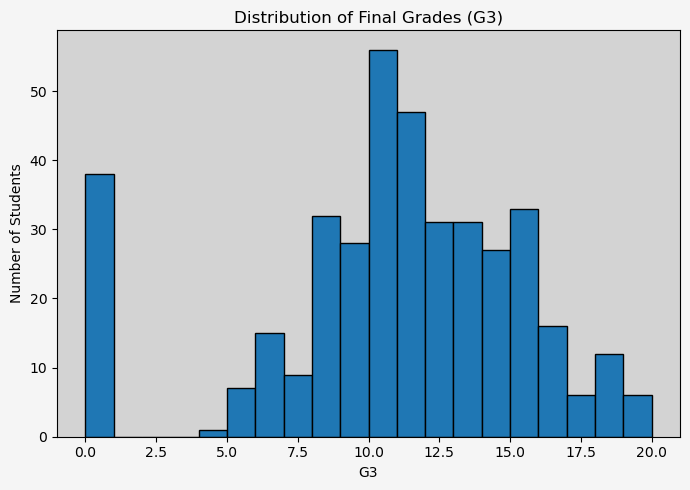

In [6]:
# Descriptive statistics for the G3 (final grade) column
g3_mean = df['g3'].mean().round(2)    
g3_median = round(df['g3'].median(), 2)   
g3_min = df['g3'].min()   
g3_max = df['g3'].max()   
g3_std = round(df['g3'].std(), 2)

print(f'G3 - Mean: {g3_mean}')
print(f'G3 - Median: {g3_median}')
print(f'G3 - Min: {g3_min}')
print(f'G3 - Max: {g3_max}')
print(f'G3 - Standard Deviation: {g3_std}\n')

# Histogram of the final grade distribution (G3)
plt.figure(figsize=(7,5))
plt.hist(df['g3'], bins=20, edgecolor='black')
plt.gcf().set_facecolor('whitesmoke')
plt.gca().set_facecolor('lightgray')
plt.xlabel('G3')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grades (G3)')
plt.tight_layout()
plt.savefig("charts/g3_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

Feature: NURSERY

------------------------------
Plot
------------------------------


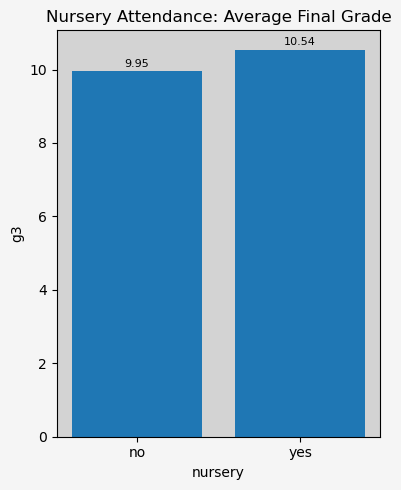


------------------------------
Difference in G3 (yes-no)
------------------------------
Difference in average G3 (yes - no): 0.59

------------------------------
Correlation with G3
------------------------------
Correlation: NURSERY vs G3
Score: 0.0516
Strength: very weak (positive)


In [7]:
#Circle of Influence Analysis: NURSERY
feature_report(df, df_ml, 'nursery', 'g3', plot_title='Nursery Attendance: Average Final Grade', folder='charts')

Feature: INTERNET

------------------------------
Plot
------------------------------


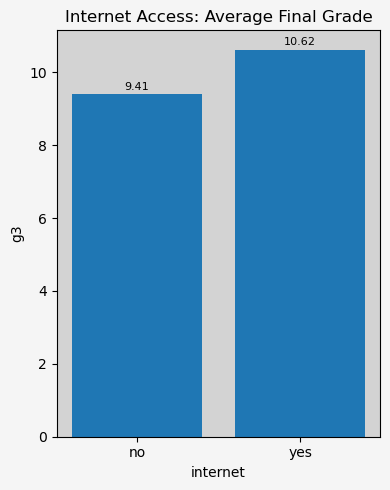


------------------------------
Difference in G3 (yes-no)
------------------------------
Difference in average G3 (yes - no): 1.21

------------------------------
Correlation with G3
------------------------------
Correlation: INTERNET vs G3
Score: 0.0985
Strength: very weak (positive)


In [8]:
# Circle of Influence Analysis: INTERNET
feature_report(df, df_ml, 'internet', 'g3', plot_title='Internet Access: Average Final Grade', folder='charts')

Feature: ACTIVITIES

------------------------------
Plot
------------------------------


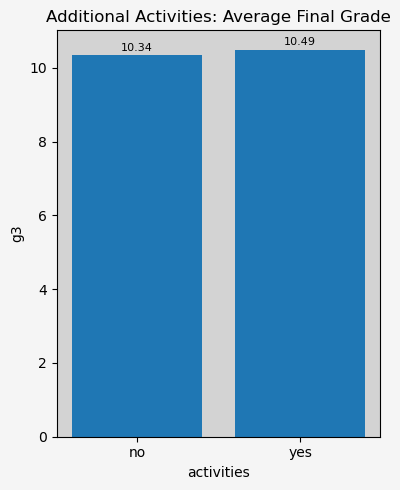


------------------------------
Difference in G3 (yes-no)
------------------------------
Difference in average G3 (yes - no): 0.15

------------------------------
Correlation with G3
------------------------------
Correlation: ACTIVITIES vs G3
Score: 0.0161
Strength: very weak (positive)


In [9]:
# Circle of Influence Analysis: ACTIVITIES
feature_report(df, df_ml, 'activities', 'g3', plot_title='Additional Activities: Average Final Grade', folder='charts')

Feature: PAID

------------------------------
Plot
------------------------------


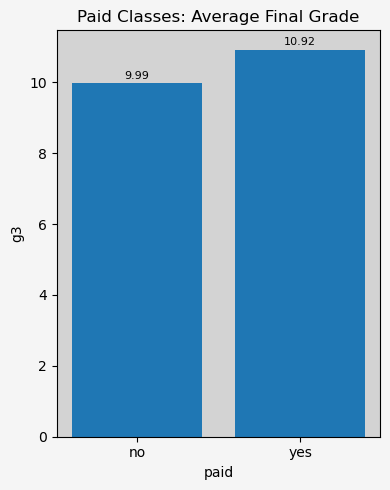


------------------------------
Difference in G3 (yes-no)
------------------------------
Difference in average G3 (yes - no): 0.93

------------------------------
Correlation with G3
------------------------------
Correlation: PAID vs G3
Score: 0.102
Strength: very weak (positive)


In [10]:
# Circle of Influence Analysis: PAID
feature_report(df, df_ml, 'paid', 'g3', plot_title='Paid Classes: Average Final Grade', folder='charts')

Feature: FAMSUP

------------------------------
Plot
------------------------------


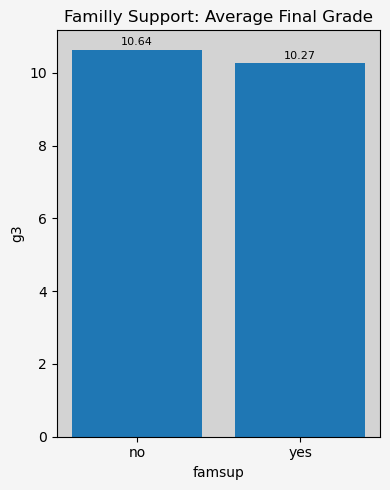


------------------------------
Difference in G3 (yes-no)
------------------------------
Difference in average G3 (yes - no): -0.37

------------------------------
Correlation with G3
------------------------------
Correlation: FAMSUP vs G3
Score: -0.0392
Strength: very weak (negative)


In [11]:
# Circle of Influence Analysis: FAMSUP
feature_report(df, df_ml, 'famsup', 'g3', plot_title='Familly Support: Average Final Grade', folder='charts')

Feature: GUARDIAN_MOTHER

------------------------------
Plot
------------------------------


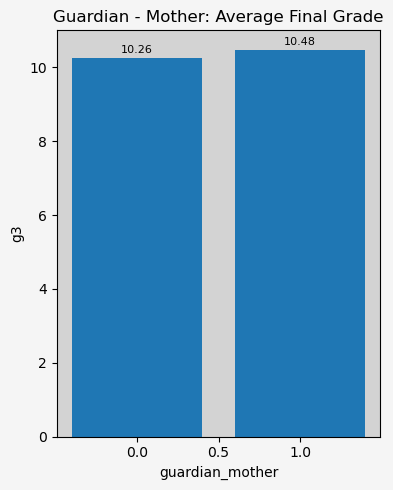


------------------------------
Difference in G3 (yes-no)
------------------------------
Difference in average G3 (1 - 0): 0.22
Note: 1 = category present, 0 = category absent

------------------------------
Correlation with G3
------------------------------
Correlation: GUARDIAN_MOTHER vs G3
Score: 0.0223
Strength: very weak (positive)


In [12]:
# Circle of Influence Analysis: GUARDIAN - MOTHER
feature_report(df, df_ml, 'guardian_mother', 'g3', plot_title='Guardian - Mother: Average Final Grade', folder='charts')

Feature: GUARDIAN_FATHER

------------------------------
Plot
------------------------------


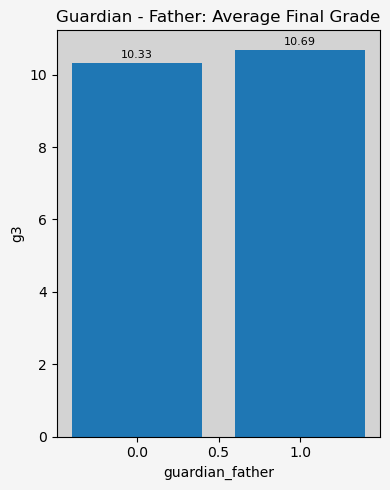


------------------------------
Difference in G3 (yes-no)
------------------------------
Difference in average G3 (1 - 0): 0.36
Note: 1 = category present, 0 = category absent

------------------------------
Correlation with G3
------------------------------
Correlation: GUARDIAN_FATHER vs G3
Score: 0.0325
Strength: very weak (positive)


In [13]:
# Circle of Influence Analysis: GUARDIAN - FATHER
feature_report(df, df_ml, 'guardian_father', 'g3', plot_title='Guardian - Father: Average Final Grade', folder='charts')

Feature: GUARDIAN_OTHER

------------------------------
Plot
------------------------------


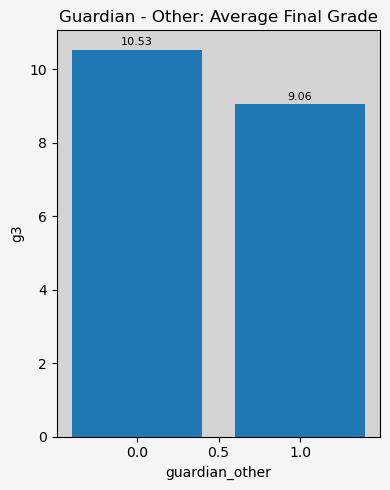


------------------------------
Difference in G3 (yes-no)
------------------------------
Difference in average G3 (1 - 0): -1.47
Note: 1 = category present, 0 = category absent

------------------------------
Correlation with G3
------------------------------
Correlation: GUARDIAN_OTHER vs G3
Score: -0.0878
Strength: very weak (negative)


In [14]:
# Circle of Influence Analysis: GUARDIAN - OTHER
feature_report(df, df_ml, 'guardian_other', 'g3', plot_title='Guardian - Other: Average Final Grade', folder='charts')

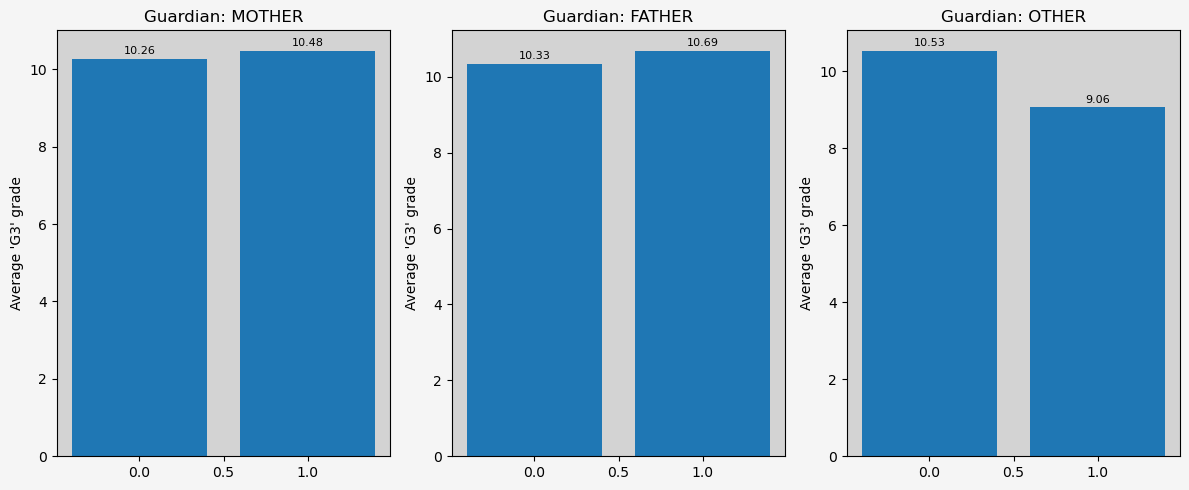

In [15]:
# Creating one plot with all guardians type

guardians = df['guardian'].unique()
bars_list = []

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for guardian, ax in zip(guardians, axes):
    group_means = df.groupby(f'guardian_{guardian}')['g3'].mean()
    bar = ax.bar(group_means.index, group_means.values)
    ax.set_title(f'Guardian: {guardian.upper()}')
    ax.set_ylabel("Average 'G3' grade")
    bars_list.append(bar)

for ax, bars in zip(axes, bars_list):
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height() + bar.get_height()*0.02,
            f'{bar.get_height():.2f}',
            ha='center', va='center', fontsize=8)

fig.patch.set_facecolor('whitesmoke')
for ax in axes:
    ax.set_facecolor('lightgray')

fig.tight_layout()
fig.savefig("charts/guardians.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# Multiple Circle of Influence Comparison

positive = df[(df['guardian'].isin(['mother', 'father'])) & (df['internet'] == 'yes') & (df['paid'] == 'yes') & (df['nursery'] == 'yes')]
positive_grade = positive['g3'].mean().round(2)
negative = df[(df['guardian'] == 'other') & (df['internet'] == 'no') & (df['paid'] == 'no') & (df['nursery'] == 'no')]
negative_grade = negative['g3'].mean().round(2)

diff = round(positive_grade - negative_grade, 2)
diff_percentage = round((positive_grade - negative_grade) / negative_grade * 100, 2)

print("="*60)
print("MULTIPLE COI FACTORS COMPARISON")
print("="*60)
print(f'Students with positive COI factors: {len(positive)}')
print(f'Students with negative COI factors:: {len(negative)}')
print()
print(f"Average G3 (positive group): {positive_grade}")
print(f"Average G3 (negative group): {negative_grade}")
print()
print(f'Difference: {diff} points.\n'
     f"Relative Increase: {diff_percentage}%.")
print()

# IMPORTANT NOTE: 
# The "negative COI" group contains only 3 students.
# Such a small sample cannot represent the population and should not be interpreted as a reliable insight.
# Therefore, this comparison is NOT included in the final README.

MULTIPLE COI FACTORS COMPARISON
Students with positive COI factors: 128
Students with negative COI factors:: 3

Average G3 (positive group): 11.12
Average G3 (negative group): 5.33

Difference: 5.79 points.
Relative Increase: 108.63%.

